In [17]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy as sp
import pandas as pd
import pickle


betweenness = open('betweenness_score.pickle', 'rb')
obj_betweenness = pickle.load(betweenness)


## preprocessing
G0 = nx.read_weighted_edgelist("4932.protein.links.v11.5.txt",comments="#",nodetype=str)
threshold_score = 700
for edge in G0.edges: 
    weight = list(G0.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G0.remove_edge(edge[0],edge[1])
essential_proteins = pd.read_csv("essential_proteins.csv", header = None)

for node in list(G0.nodes()):
    if node[5:] in list(essential_proteins[1]):
        G0.remove_node(node)

D_Cen = nx.degree_centrality(G0)
Eigen_Cen = nx.eigenvector_centrality(G0)
Close_Cen = nx.closeness_centrality(G0)


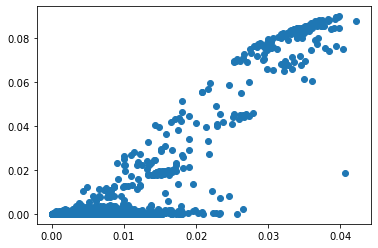

In [19]:
plt.scatter(D_Cen.values(), Eigen_Cen.values())

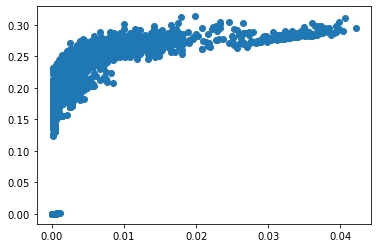

In [15]:
plt.scatter(D_Cen.values(), Close_Cen.values())

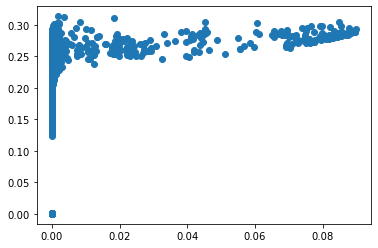

In [16]:
plt.scatter(Eigen_Cen.values(), Close_Cen.values())